### The commands that we used in this project :

* import pandas as pd -- To import Pandas library
* pd.read_csv - To import the CSV file in Jupyter notebook
* import seaborn as sns - To import the Seaborn library.
* import matplotlib.pyplot as plt - To import the Matplotlib library.
* pd.to_datetime(df.Date_Time_Col) - Converts the data-type of Date-Time Column into datetime[ns] datatype.
* df.Time_Col.dt.year - Creating a new column with only year values 
* df.Time_Col.dt.month - Creating a new column with only month values.
* df.insert( index , ‘new_column_name’, new_column_values) - To insert a New column at a particular position with values in it.
* df.drop(['Col_name'] , axis=1 , inplace = True) - To drop a column from the dataframe permanently.
* df.groupby(‘Col_name’) - To form groups of all unique values of the column.
* df[df.Col_1 = = ‘Element1’] - Filtering – We are accessing all records with Element1 only of Col_1.
* df.groupby(‘Col_1’)[‘Col_2’] .mean( ) - To create groups - Two Keys – Apply on Col_2 grouped by Col_1.

In [64]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_theme(context = 'poster' , style = 'ticks' , palette = 'plasma' , font_scale = 0.7 , rc = {'figure.figsize':[20 , 8]})

In [65]:
df = pd.read_csv('London Housing Data.csv')
df

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


### df.count() - It counts the no. of non-null values of each column.

In [66]:
df.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

### df.isnull().sum() - It detects the missing values from the dataframe.

In [67]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

### sns.heatmap(df.isnull()) - It will show the all columns & missing values in them in heat map form.
##### plt.show() - To show the plot.

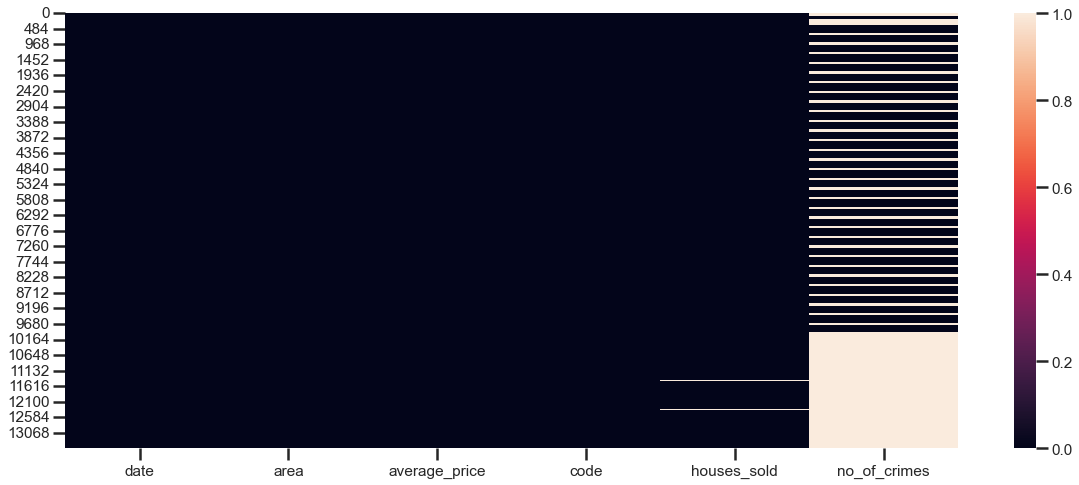

In [68]:
sns.heatmap(df.isnull())
plt.show()

### df.dtypes - To show the datatype of each column.

In [69]:
df.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

### Q. 1) Convert the Datatype of 'Date' column to Date-Time format.

In [70]:
df['date'] = pd.to_datetime(df.date)
df

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN
13545,2019-10-01,england,249376,E92000001,68677.0,NaN
13546,2019-11-01,england,248515,E92000001,67814.0,NaN
13547,2019-12-01,england,250410,E92000001,NaN,NaN


### Q. 2) Add a new column ''year'' in the dataframe, which contains years only.(B.2) Add a new column ''month'' as 2nd column in the dataframe, which contains month only.

In [72]:
df['Year'] = df.date.dt.year
df.Year

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
13544    2019
13545    2019
13546    2019
13547    2019
13548    2020
Name: Year, Length: 13549, dtype: int64

In [73]:
# in case we need month name we have to create a dictionary of months names and numbers then map it to month column
df.insert( 1 , 'Month', df.date.dt.month) 
df

,date,Month,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,9,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,10,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,11,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,12,england,250410,E92000001,NaN,NaN,2019


### Q. 3) Remove the columns 'year' and 'month' from the dataframe.

In [74]:
df.drop(axis=1,columns=['Month','Year'],inplace= True)
df

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN
13545,2019-10-01,england,249376,E92000001,68677.0,NaN
13546,2019-11-01,england,248515,E92000001,67814.0,NaN
13547,2019-12-01,england,250410,E92000001,NaN,NaN


### Q. 4) Show all the records where 'No. of Crimes' is 0. And, how many such records are there ?

In [75]:
df[df['no_of_crimes'] == 0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


### Q. 5) What is the maximum & minimum 'average_price' per year in england ?

In [76]:
df['Year'] = df.date.dt.year
df.Year

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
13544    2019
13545    2019
13546    2019
13547    2019
13548    2020
Name: Year, Length: 13549, dtype: int64

In [77]:
eng = df[df['area'] == 'england']
eng.groupby('Year')['average_price'].max().sort_values(ascending = False)

Year
2019    250410
2018    248620
2020    247355
2017    242628
2016    231922
2015    219582
2014    203639
2007    194764
2008    191750
2013    188544
2006    182031
2010    180807
2012    180129
2011    177335
2009    174136
2005    167244
2004    160330
2003    138985
2002    119982
2001     95992
2000     84191
1999     75071
1998     65743
1997     61564
1996     55755
1995     53901
Name: average_price, dtype: int64

In [78]:
eng.groupby('Year')['average_price'].min().sort_values(ascending = True)

Year
1996     52333
1995     52788
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2009    159340
2008    165795
2006    166544
2011    173046
2012    174161
2010    174458
2013    176816
2007    181824
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
2020    247355
Name: average_price, dtype: int64

### Q. 6) What is the Maximum & Minimum No. of Crimes recorded per area ?

In [79]:
df.groupby('area')['no_of_crimes'].max().sort_values(ascending = False)

area
westminster               7461.0
lambeth                   4701.0
camden                    4558.0
southwark                 3821.0
newham                    3668.0
hackney                   3466.0
ealing                    3401.0
islington                 3384.0
tower hamlets             3316.0
croydon                   3263.0
haringey                  3199.0
wandsworth                3051.0
waltham forest            2941.0
brent                     2937.0
barnet                    2893.0
greenwich                 2853.0
hillingdon                2819.0
hounslow                  2817.0
lewisham                  2813.0
enfield                   2798.0
kensington and chelsea    2778.0
hammersmith and fulham    2645.0
bromley                   2637.0
redbridge                 2560.0
barking and dagenham      2049.0
havering                  1956.0
bexley                    1914.0
harrow                    1763.0
merton                    1623.0
richmond upon thames      1551.0
sutto

In [84]:
df.groupby('area')['no_of_crimes'].min().sort_values(ascending = True)

area
city of london               0.0
kingston upon thames       692.0
richmond upon thames       700.0
sutton                     787.0
merton                     819.0
bexley                     860.0
harrow                     937.0
havering                  1130.0
barking and dagenham      1217.0
hammersmith and fulham    1323.0
kensington and chelsea    1347.0
bromley                   1441.0
hillingdon                1445.0
redbridge                 1487.0
greenwich                 1513.0
hounslow                  1529.0
haringey                  1536.0
waltham forest            1575.0
wandsworth                1582.0
enfield                   1635.0
tower hamlets             1646.0
lewisham                  1675.0
barnet                    1703.0
brent                     1850.0
hackney                   1870.0
ealing                    1871.0
islington                 1871.0
croydon                   2031.0
camden                    2079.0
newham                    2130.0
south

### Q. 7) Show the total count of records of each area, where average price is less than 100000.

In [81]:
less_than_100k  = df[df['average_price'] < 100000]
less_than_100k

,date,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...
13330,2001-11-01,england,95083,E92000001,109149.0,NaN,2001
13331,2001-12-01,england,95992,E92000001,93329.0,NaN,2001
13332,2002-01-01,england,96215,E92000001,71678.0,NaN,2002
13333,2002-02-01,england,96676,E92000001,77131.0,NaN,2002


In [86]:
less_than_100k.groupby('area')['code'].count().sort_values(ascending = False)

area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
waltham forest           64
bexley                   64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
bromley                  33
haringey                 33
ealing                   31
inner london             31
kingston upon thames     30
harrow         

In [85]:
# easier solution
df[df['average_price'] < 100000].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow              

### By Anas Awad